<a href="https://colab.research.google.com/github/robsonbrandao/artigos/blob/main/04%20-%20ProcessamentoLinguagemNatural/ProcessamentoLinguagemNatural%20network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Processamento de Linguagem Natural**


---



## **Instalando o pacote spacy e modelos de linguagem**

In [2]:
import spacy

import pandas as pd
import spacy
import networkx as nx                        # a really useful network analysis library
import matplotlib.pyplot as plt
# from networkx.algorithms import community   # not used, yet... 
import datetime                              # access to %%time, for timing individual notebook cells
import os

### Atualizando o spacy

In [3]:
!pip install --upgrade spacy

     |████████████████████████████████| 6.0 MB 5.0 MB/s 
     |████████████████████████████████| 451 kB 68.5 MB/s 
     |████████████████████████████████| 181 kB 36.5 MB/s 
     |████████████████████████████████| 42 kB 1.4 MB/s 
     |████████████████████████████████| 10.1 MB 43.4 MB/s 
     |████████████████████████████████| 653 kB 58.4 MB/s 
  Attempting uninstall: catalogue
    Found existing installation: catalogue 1.0.0
    Uninstalling catalogue-1.0.0:
      Successfully uninstalled catalogue-1.0.0
  Attempting uninstall: srsly
    Found existing installation: srsly 1.0.5
    Uninstalling srsly-1.0.5:
      Successfully uninstalled srsly-1.0.5
  Attempting uninstall: thinc
    Found existing installation: thinc 7.4.0
    Uninstalling thinc-7.4.0:
      Successfully uninstalled thinc-7.4.0
  Attempting uninstall: spacy
    Found existing installation: spacy 2.2.4
    Uninstalling spacy-2.2.4:
      Successfully uninstalled spacy-2.2.4


In [1]:
# Chamar o spacy com a nova versão
import spacy
import pandas as pd
import spacy
import networkx as nx                        # a really useful network analysis library
import matplotlib.pyplot as plt
# from networkx.algorithms import community   # not used, yet... 
import datetime                              # access to %%time, for timing individual notebook cells
import os

In [2]:
!pip install -U spacy-lookups-data 

     |████████████████████████████████| 98.5 MB 94 kB/s 


**Baixar os modelos de Linguagem**

**pt_core_news_lg** é mais completo, porém mais lento

**pt_core_news_st** é a outra opção

In [3]:
!python -m spacy download pt_core_news_lg

     |████████████████████████████████| 577.4 MB 3.5 kB/s 
✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_lg')


**Trabalhar com o primeiro texto**

In [15]:
# Carregar o modelo de linguagem

nlp = spacy.load('pt_core_news_lg')


In [16]:
rowlimit = 500              # this limits the tweets to a manageable number
data = pd.read_csv('FO_TESES_10.csv', nrows = rowlimit, sep=";")
data.shape

(14, 11)

In [8]:
data.head()

,SYSNO,AUTOR,TÍTULO,ANO DE DEFESA,NOME DEPARTAMENTO,SIGLA DEPARTAMENTO,ÁREA DE CONCENTRAÇÃO,ASSUNTOS,ORIENTADOR,RESUMO,ABSTRACT
0,3061472,"Pássaro, Ana Laura",Resina composta com tecnologia giomer comparad...,2021,NaN,ODO,ODONTOPEDIATRIA E ORTODONTIA,ANÁLISE DE SOBREVIVÊNCIA||CÁRIE DENTÁRIA||CIME...,"Raggio, Daniela Prócida",O objetivo desta tese é relatar os achados de ...,The aim of this thesis is to report the findin...
1,3061476,"Ronchim, Victor dos Santos",A study in set-theoretic functional analysis: ...,2021,NaN,MAT,MATEMÁTICA,ANÁLISE FUNCIONAL||TOPOLOGIA CONJUNTÍSTICA,"Oliveira, Claudia da Silva||Tausk, Daniel Victor",Na primeira parte deste trabalho nós investiga...,In the first part of this work we investigate ...
2,3061478,"Santos, Felipe Albino dos",Álgebras de Krichever-Novikov superelípticas,2021,NaN,MAT,MATEMÁTICA,POLINÔMIOS ORTOGONAIS||ÁLGEBRA,"Futorny, Vyacheslav",Este trabalho apresenta um estudo das álgebras...,The present work addresses the Krichever-Novik...
3,3061543,"Costa, Andre Ricardo Reis",Estudos sobre o valor dos investimentos em pes...,2021,NaN,EAD,ADMINISTRAÇÃO,INOVAÇÃO||PROJETOS DE PESQUISA||INVESTIMENTOS|...,"Kayo, Eduardo Kazuo","A presente tese é composta por três artigos, u...",This doctoral dissertation is composed of thre...
4,3061568,"Mosaner, Fabio Ferreira Lins",O desenho e o processo de produção da arquitetura,2021,NaN,AUP,PROJETO DE ARQUITETURA,PROJETO DE ARQUITETURA||DESENHO||PROCESSOS PRÉ...,"Amorim, Anália Maria Marinho de Carvalho",Esta tese investiga os processos de produção d...,This work investigates the production processe...


In [20]:
tokens = []
lemma = []
pos = []
parsed_doc = [] 
col_to_parse = 'RESUMO'

for doc in nlp.pipe(data[col_to_parse].astype('unicode').values, batch_size=50):
    if doc.is_parsed:
        parsed_doc.append(doc)
        tokens.append([n.text for n in doc])
        lemma.append([n.lemma_ for n in doc])
        pos.append([n.pos_ for n in doc])
    else:
        # We want to make sure that the lists of parsed results have the
        # same number of entries of the original Dataframe, so add some blanks in case the parse fails
        tokens.append(None)
        lemma.append(None)
        pos.append(None)


data['parsed_doc'] = parsed_doc
data['comment_tokens'] = tokens
data['comment_lemma'] = lemma
data['pos_pos'] = pos

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: [W107] The property `Doc.is_parsed` is deprecated. Use `Doc.has_annotation("DEP")` instead.
  


In [21]:
data.head(8)

,SYSNO,AUTOR,TÍTULO,ANO DE DEFESA,NOME DEPARTAMENTO,SIGLA DEPARTAMENTO,ÁREA DE CONCENTRAÇÃO,ASSUNTOS,ORIENTADOR,RESUMO,ABSTRACT,parsed_doc,comment_tokens,comment_lemma,pos_pos
0,3061472,"Pássaro, Ana Laura",Resina composta com tecnologia giomer comparad...,2021,NaN,ODO,ODONTOPEDIATRIA E ORTODONTIA,ANÁLISE DE SOBREVIVÊNCIA||CÁRIE DENTÁRIA||CIME...,"Raggio, Daniela Prócida",O objetivo desta tese é relatar os achados de ...,The aim of this thesis is to report the findin...,"(O, objetivo, desta, tese, é, relatar, os, ach...","[O, objetivo, desta, tese, é, relatar, os, ach...","[O, objetivo, desta, tesar, ser, relatar, o, a...","[DET, NOUN, ADP, NOUN, AUX, VERB, DET, NOUN, A..."
1,3061476,"Ronchim, Victor dos Santos",A study in set-theoretic functional analysis: ...,2021,NaN,MAT,MATEMÁTICA,ANÁLISE FUNCIONAL||TOPOLOGIA CONJUNTÍSTICA,"Oliveira, Claudia da Silva||Tausk, Daniel Victor",Na primeira parte deste trabalho nós investiga...,In the first part of this work we investigate ...,"(Na, primeira, parte, deste, trabalho, nós, in...","[Na, primeira, parte, deste, trabalho, nós, in...","[Na, primeiro, partir, dar, trabalhar, nó, inv...","[ADP, ADJ, NOUN, ADP, NOUN, PRON, VERB, NOUN, ..."
2,3061478,"Santos, Felipe Albino dos",Álgebras de Krichever-Novikov superelípticas,2021,NaN,MAT,MATEMÁTICA,POLINÔMIOS ORTOGONAIS||ÁLGEBRA,"Futorny, Vyacheslav",Este trabalho apresenta um estudo das álgebras...,The present work addresses the Krichever-Novik...,"(Este, trabalho, apresenta, um, estudo, das, á...","[Este, trabalho, apresenta, um, estudo, das, á...","[Este, trabalhar, apresentar, um, estudar, das...","[DET, NOUN, VERB, DET, NOUN, ADP, NOUN, ADP, P..."
3,3061543,"Costa, Andre Ricardo Reis",Estudos sobre o valor dos investimentos em pes...,2021,NaN,EAD,ADMINISTRAÇÃO,INOVAÇÃO||PROJETOS DE PESQUISA||INVESTIMENTOS|...,"Kayo, Eduardo Kazuo","A presente tese é composta por três artigos, u...",This doctoral dissertation is composed of thre...,"(A, presente, tese, é, composta, por, três, ar...","[A, presente, tese, é, composta, por, três, ar...","[A, presentar, tesar, ser, composto, por, três...","[DET, ADJ, NOUN, AUX, VERB, ADP, NUM, NOUN, PU..."
4,3061568,"Mosaner, Fabio Ferreira Lins",O desenho e o processo de produção da arquitetura,2021,NaN,AUP,PROJETO DE ARQUITETURA,PROJETO DE ARQUITETURA||DESENHO||PROCESSOS PRÉ...,"Amorim, Anália Maria Marinho de Carvalho",Esta tese investiga os processos de produção d...,This work investigates the production processe...,"(Esta, tese, investiga, os, processos, de, pro...","[Esta, tese, investiga, os, processos, de, pro...","[Esta, tesar, investigar, o, processo, de, pro...","[DET, NOUN, VERB, DET, NOUN, ADP, NOUN, ADP, N..."
5,3061639,"Machado, Luciene Oliveira",Estudo estrutural e termodifusivo das partícul...,2021,NaN,FEP,FÍSICA,ESPALHAMENTO DE RAIOS X A BAIXOS ÂNGULOS||LIPO...,"Figueiredo Neto, Antonio Martins","As doenças cardiovasculares estão, atualmente,...","Cardiovascular diseases, such as atheroscleros...","(As, doenças, cardiovasculares, estão, ,, atua...","[As, doenças, cardiovasculares, estão, ,, atua...","[As, doença, cardiovascular, estar, ,, atualme...","[DET, NOUN, ADJ, AUX, PUNCT, ADV, PUNCT, ADP, ..."
6,3061640,"Barbosa, Jacson Rodrigues",Heterogeneous information network to support t...,2021,NaN,SSC,Ciências de Computação e Matemática Computacional,REDES DE INFORMAÇÃO||SOFTWARES||STAKEHOLDER||A...,"Delamaro, Márcio Eduardo",Contexto. Ao longo do ciclo de vida de um soft...,"Context. Throughout a softwares lifecycle, num...","(Contexto, ., Ao, longo, do, ciclo, de, vida, ...","[Contexto, ., Ao, longo, do, ciclo, de, vida, ...","[Contexto, ., Ao, longo, do, ciclo, de, vidar,...","[NOUN, PUNCT, ADP, NOUN, ADP, NOUN, ADP, NOUN,..."
7,3061673,"Oblitas, Raissa Lima de",Caracterização de propriedades mecânicas da re...,2021,NaN,FAP,FÍSICA,FIBRAS NATURAIS||MICROSCÓPIO ELETRÔNICO||ELAST...,"Salvadori, Maria Cecília Barbosa da Silveira",Este trabalho apresenta a utilização da Micros...,"In this work

In [22]:
data.RESUMO[0]

'O objetivo desta tese é relatar os achados de um ensaio clínico randomizado de superioridade conduzido em ambiente escolar, cujo desfecho primário foi avaliar a longevidade de restaurações atraumáticas (ART) ocluso-proximais de molares decíduos, utilizando uma resina composta com tecnologia giomer associada a um sistema adesivo universal de passo único (RCG - Beautifil Bulk Fill® e BeautiBond®) e um cimento de ionômero de vidro de alta viscosidade encapsulado (CIV - Equia Forte®). O objetivo secundário deste estudo foi avaliar a custo-efetividade destas intervenções. Os desfechos primário e secundário foram relatados de acordo com as normas CONSORT e CHEERS, respectivamente. Cento e oitenta e duas crianças com idade entre 4 e 8 anos de idade que estavam matriculadas em escolas municipais de Cerquilho (SP, Brasil) foram incluídas e randomizadas para os grupos, de acordo com o material restaurador. Apenas um dente foi incluído por criança e todas elas foram tratadas de acordo com a filo

In [23]:
stop_words = spacy.lang.pt.stop_words.STOP_WORDS
print('Number of stopwords: %d' % len(stop_words))
print(list(stop_words))

Number of stopwords: 416
['sabe', 'contra', 'ademais', 'ele', 'outras', 'onde', 'isso', 'nesse', 'tenho', 'tu', 'aí', 'alguns', 'teu', 'pode', 'mal', 'inicio', 'grupo', 'você', 'vossos', 'seus', 'então', 'parece', 'diz', 'suas', 'caminho', 'sua', 'atrás', 'número', 'foram', 'põem', 'tem', 'aqueles', 'parte', 'números', 'todos', 'bastante', 'se', 'vocês', 'dentro', 'sétimo', 'pôde', 'acerca', 'lugar', 'fazemos', 'fostes', 'posição', 'cima', 'mas', 'desse', 'apenas', 'deste', 'desde', 'tivemos', 'cento', 'maioria', 'me', 'nada', 'uns', 'ponto', 'tendes', 'nenhuma', 'terceiro', 'catorze', 'essas', 'longe', 'bem', 'quer', 'posso', 'quinze', 'primeiro', 'oito', 'dezanove', 'quieta', 'cinco', 'favor', 'pontos', 'sobre', 'no', 'nossa', 'só', 'terceira', 'ver', 'aquilo', 'ser', 'tanta', 'esse', 'poder', 'por', 'numa', 'aquele', 'for', 'mais', 'puderam', 'perto', 'tempo', 'eles', 'tentaram', 'apontar', 'mil', 'num', 'o', 'vosso', 'ela', 'vinte', 'estiveram', 'tens', 'até', 'menos', 'tarde', 'ad

In [24]:
world_data = data

In [25]:
# takes 1s for 500 nodes - but of course this won't scale linearly!                              
raw_G = nx.Graph() # undirected
n = 0

for i in world_data['parsed_doc']:        # sure, it's inefficient, but it will do
    for j in world_data['parsed_doc']:
        if i != j:
            if not (raw_G.has_edge(j, i)):
                sim = i.similarity(j)
                raw_G.add_edge(i, j, weight = sim)
                n = n + 1

print(raw_G.number_of_nodes(), "nodes, and", raw_G.number_of_edges(), "edges created.")

14 nodes, and 91 edges created.


In [26]:
edges_to_kill = []
min_wt = 0.94      # this is our cutoff value for a minimum edge-weight 

for n, nbrs in raw_G.adj.items():
    #print("\nProcessing origin-node:", n, "... ")
    for nbr, eattr in nbrs.items():
        # remove edges below a certain weight
        data = eattr['weight']
        if data < min_wt: 
            # print('(%.3f)' % (data))  
            # print('(%d, %d, %.3f)' % (n, nbr, data))  
            #print("\nNode: ", n, "\n <-", data, "-> ", "\nNeighbour: ", nbr)
            edges_to_kill.append((n, nbr)) 
            
print("\n", len(edges_to_kill) / 2, "edges to kill (of", raw_G.number_of_edges(), "), before de-duplicating")


 83.0 edges to kill (of 91 ), before de-duplicating


In [28]:
for u, v in edges_to_kill:
    if raw_G.has_edge(u, v):   # catches (e.g.) those edges where we've removed them using reverse ... (v, u)
        raw_G.remove_edge(u, v)

In [29]:
strong_G = raw_G
print(strong_G.number_of_edges())

8


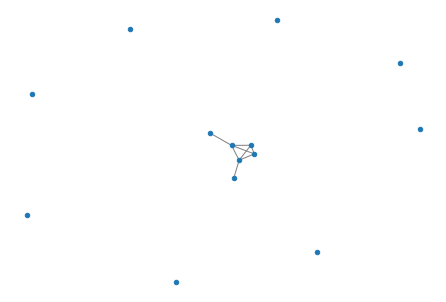

In [30]:
nx.draw(strong_G, node_size=20, edge_color='gray')

In [36]:
strong_G.remove_nodes_from(list(nx.isolates(strong_G)))

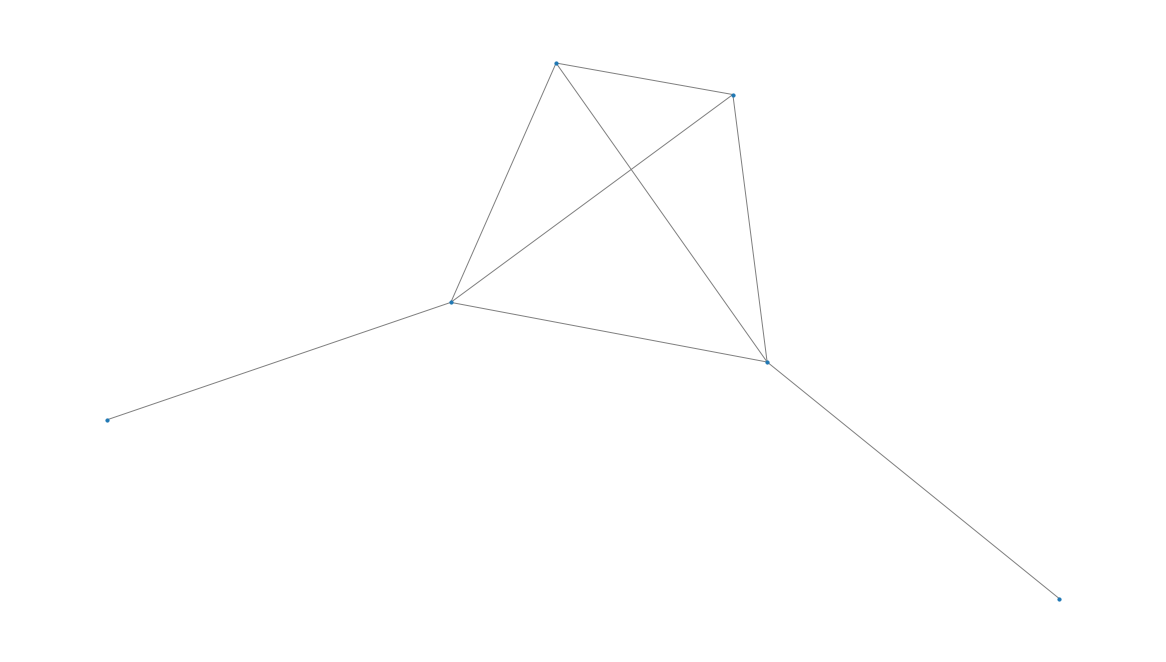

In [37]:
from math import sqrt
count = strong_G.number_of_nodes()
equilibrium = 10 / sqrt(count)    # default for this is 1/sqrt(n), but this will 'blow out' the layout for better visibility
pos = nx.fruchterman_reingold_layout(strong_G, k=equilibrium, iterations=300)
nx.draw(strong_G, pos=pos, node_size=10, edge_color='gray')

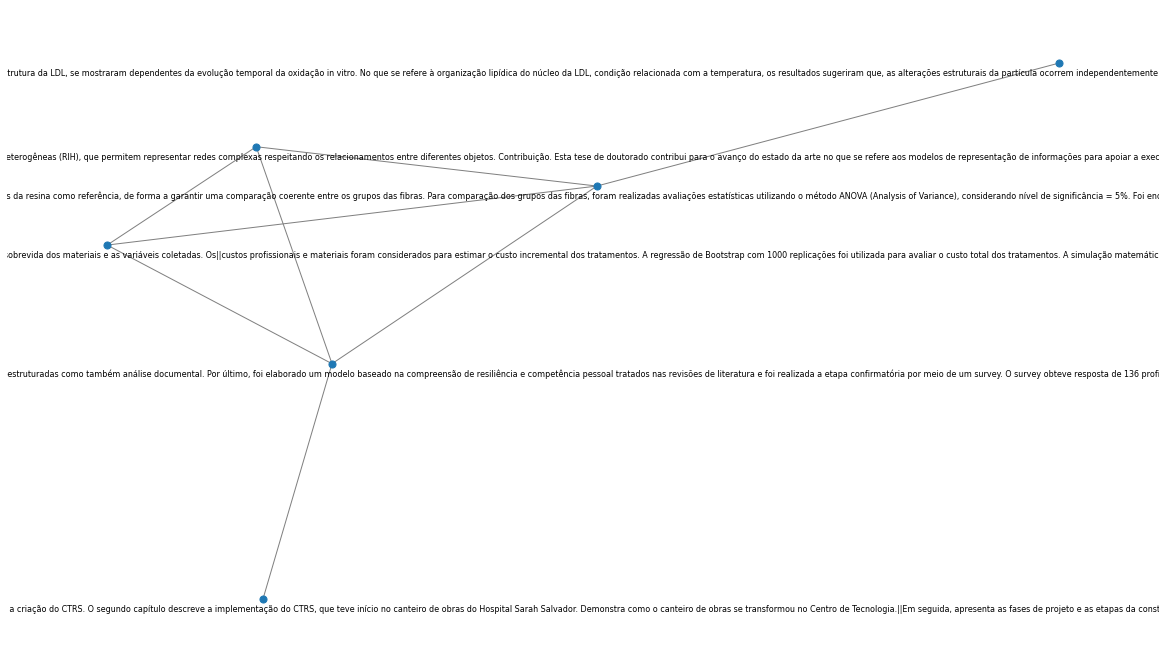

In [33]:
plt.rcParams['figure.figsize'] = [16, 9]  # a better aspect ratio for labelled nodes

nx.draw(strong_G, pos, font_size=3, node_size=50, edge_color='gray', with_labels=False)
for p in pos:  # raise positions of the labels, relative to the nodes
    pos[p][1] -= 0.03
nx.draw_networkx_labels(strong_G, pos, font_size=8, font_color='k')

plt.show()